### Chapter 5.6.3
#  Kingman’s Approximation of Mean Waiting Times

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

An accurate and computationally manageable analysis of GI/GI/1 queues with general distributions is difficult. However, there are approximate solutions in the literature. In practice, an important system characteristic is the mean waiting time. Thereby, operators may not require very accurate results, but rather an approximation of the expected waiting time or bounds of the waiting times in order to dimension the system. Kingman provides an approximation $\widetilde{W}$ for the mean waiting time $E[W]$ as well as bounds.

$\displaystyle  E[W] \approx \left(\frac{\rho}{1-\rho}\right) \left(\frac{c_A^2+c_B^2}{2} \right) E[B]
 = \widetilde{W} 
$

A tighter upper bound $\widehat{U}$ of the mean waiting time is provided by Daley.

$ \displaystyle E[W]  \leq  \frac{(2-\rho)c_A^2+\rho c_B^2}{2(1-\rho)} \cdot E[B] = \widehat{U} 
$


In [1]:
# Kingman approximation
def ew(rho=0.5, EB=1.0, cA=1.0, cB=1.0):
    return (rho/(1-rho))*(cA**2+cB**2)/2*EB

# Upper bound of mean waiting time
def upper(rho=0.5, EB=1.0, cA=1.0, cB=1.0):
    return ((2-rho)*cA**2 + rho*cB**2)*EB/(2*(1-rho))

## Parameter Study of the Approximation


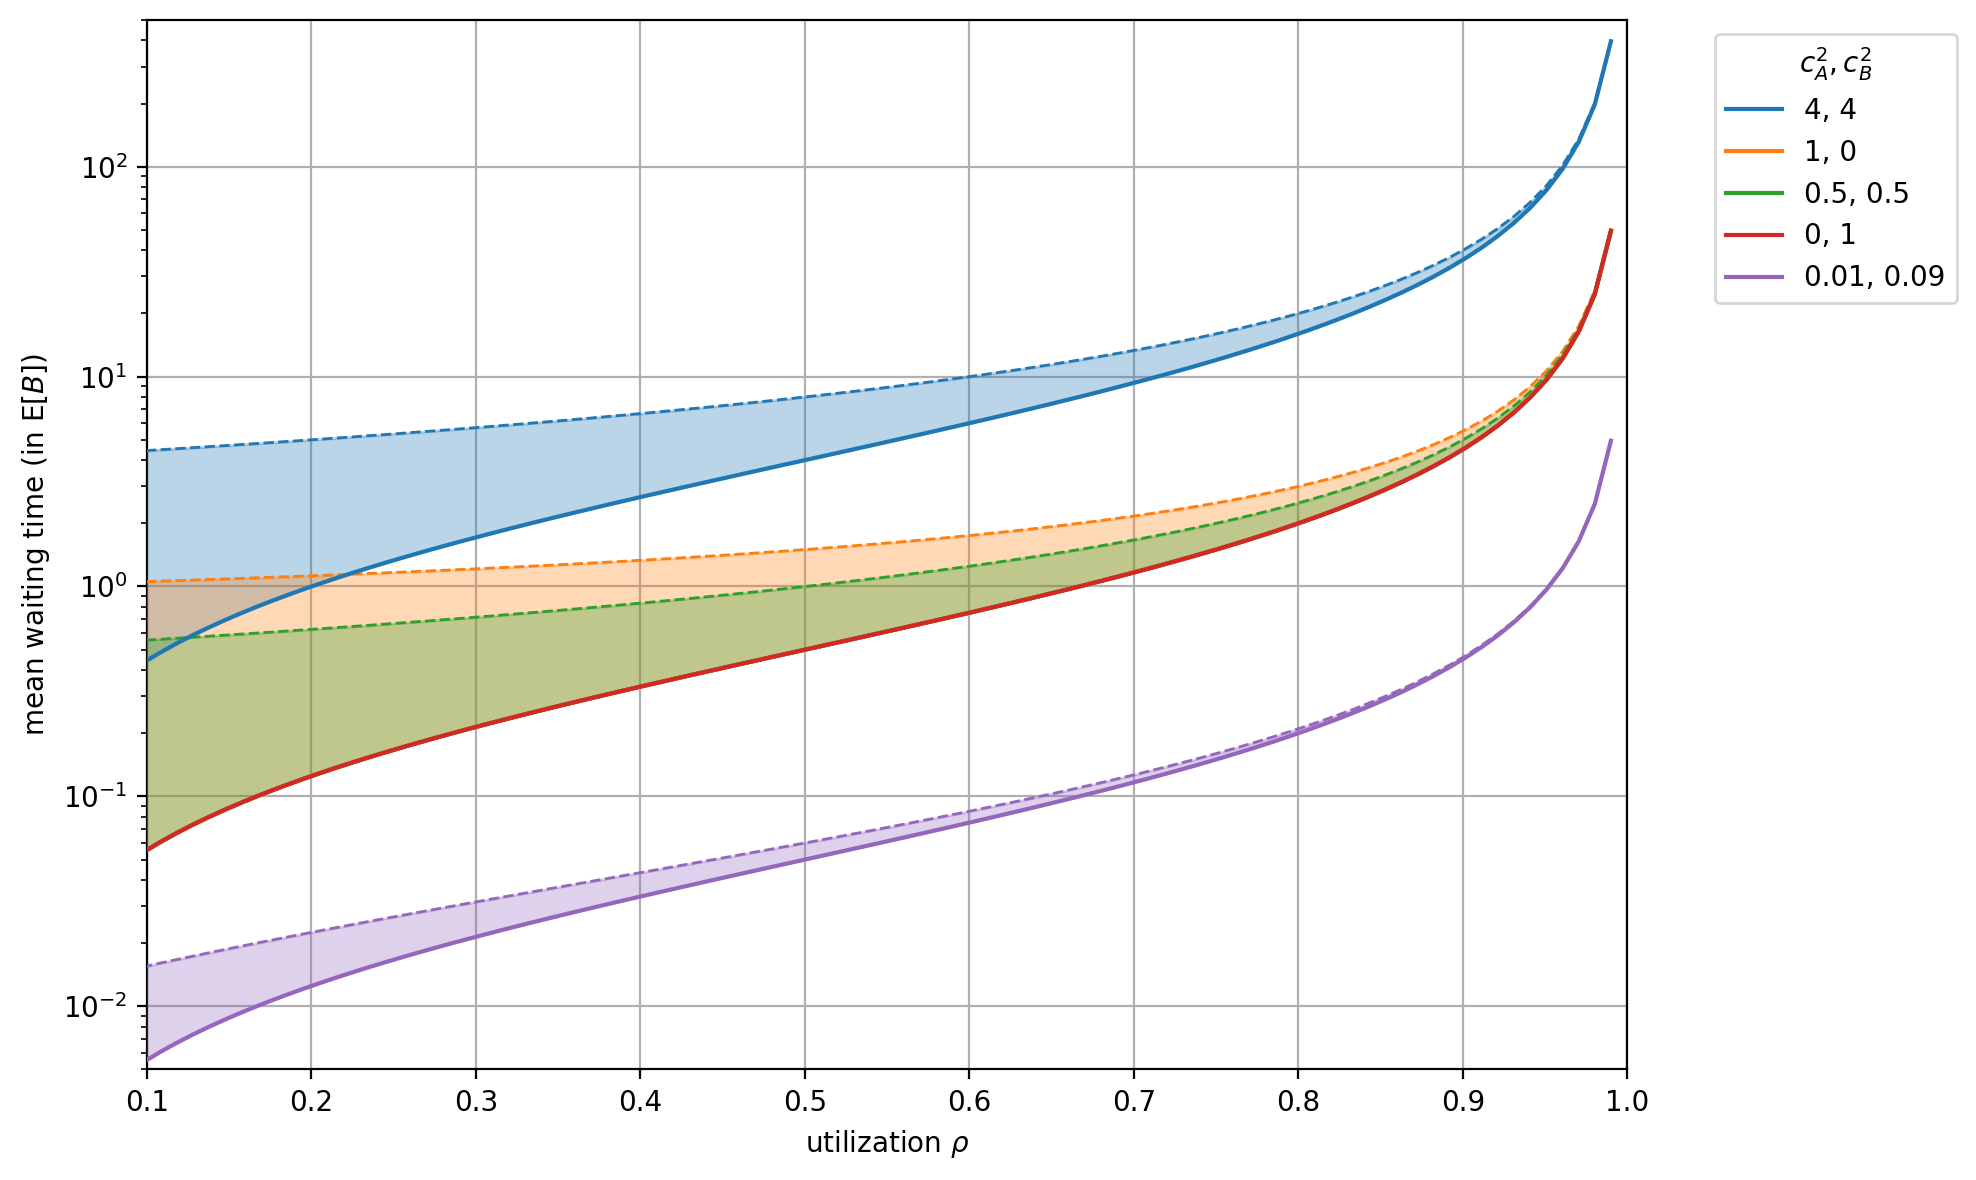

In [13]:

import numpy as np
import matplotlib.pyplot as plt

rhos = np.linspace(0.01,0.99,101) # utilization
cs = ((2,2),(1,0), (np.sqrt(0.5), np.sqrt(0.5)), (0,1), (0.1,0.3)) # coefficient of variation: (cA, cB)

fig=plt.figure(figsize=(10,6), dpi= 200, facecolor='w', edgecolor='k')
for i,(cA,cB) in enumerate(cs):
    c = plt.cm.tab10(i)    
    plt.plot(rhos, ew(rhos, cA=cA, cB=cB), label=f'{cA**2:g}, {cB**2:g}', c=c, zorder=9)
    plt.plot(rhos, upper(rhos, cA=cA, cB=cB), '--',  color=c, zorder=8, lw=1)
    plt.fill_between(rhos, ew(rhos, cA=cA, cB=cB), upper(rhos, cA=cA, cB=cB), color=c, alpha=0.3, zorder=5)
    
plt.legend(title='$c_A^2, c_B^2$',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(which='major')
plt.yscale('log')    
plt.xlabel('utilization $\\rho$')
plt.ylabel('mean waiting time (in E[$B$])')
plt.xlim([0.1,1])
plt.ylim([5e-3,5e2])
plt.tight_layout();